# Estimación de máxima verosimilitud

Como ya vimos, esta técnica, cuyas siglas en inglés son MLE (maximum likelihood estimation), nos permite encontrar la distribución de probabilidad que mejor estima un cierto conjunto de datos. Para ello consideramos dos pasos:

1. Escogemos una distribución $P(X; \theta)$, con un conjunto de parámetros $\theta$, dado un conjunto de datos $X$.

2. Seleccionamos los valores de los parámetros $\theta = \hat{\theta}$ que mejor ajustan los datos siguiendo la premisa que serán aquellos tales que: 

$$
P(X, \theta) = L(X, \hat{\theta}) = \max_{\theta} \left\{ L(X, \theta) \right\}
$$

Así pues, consideremos un conjunto de datos ${x_i}$ como el siguiente, el cual trabajamos en una clase pasada:

[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]


<BarContainer object of 19 artists>

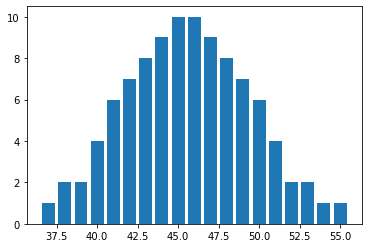

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# recuerda que este archivo lo puedes bajar de: https://seattlecentral.edu/qelp/sets/057/057.html
df = pd.read_excel('s057.xls')
arr = df['Normally Distributed Housefly Wing Lengths'].values[4:]
values, dist = np.unique(arr, return_counts=True)
print(values)
plt.bar(values, dist) 

Si buscamos la distribución que mejor ajuste los datos, lo más razonable es pensar en una gaussiana o normal, y como ya se mostró en una notebook anterior, la distribucion gaussiana ajusta muy bien estos datos. En esta notebook veremos otra cara de la moneda sobre este mismo ejercicio. 

--- 
# RETO
Usando MLE vas a demostrar que si asumimos que los datos vienen descritos por una función gaussiana:

$$
P(X;\theta)=P(X;\mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}
$$

Entonces los parámetros que mejor ajustan los datos ${x_i}$ de la celda anterior están dados por: 

$$
\mu = \frac{1}{n} \sum_i^n x_i
$$

$$
\sigma^2 = \frac{1}{n}\sum_i^n (x_i-\mu)^2
$$

donde *n* es la cantidad de datos. 

--- 

# Paso a paso (a mano)

## 1) Escribe la verosimilitud (likelihood)
Considera que en este caso asumimos que cada punto sigue una distribución normal 

$$
L(X;\theta) = \prod_i^n P(x_i;\theta)
$$

y por lo tanto la verosimilitud está dada por: 

$$
L(X;\mu, \sigma) = L(\mu, \sigma) = \prod_i^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left\{ \frac{-1}{2\sigma^2}(x_i - \mu)^2 \right\}} 
$$

## 2) Calcula las ecuaciones del valor máximo

Usando MLE se deben calcular los parámetros que conduzcan al máximo de probabilidad: 

$$
\max L(\mu, \sigma) \rightarrow \max \log L(\mu, \sigma)
$$

donde consideramos el logaritmo de la verosimilitud. Demuestra que esto equivale a: 

$$
\max L(\mu, \sigma) = \min \left( n \log \sigma + \frac{1}{2 \sigma^2} \sum_i (x_i - \mu)^2 \right)
$$

Esto equivale a encontrar el minimo de la función: 


$$f(\mu, \sigma) = n \log \sigma + \frac{1}{2 \sigma^2} \sum_i (x_i - \mu)^2$$

lo cual se hace derivando parcialmente la función respecto a ambas variables e igualando a cero.

$$
\frac{\partial L}{\partial \mu} = 0
$$

$$
\frac{\partial L}{\partial \sigma} = 0
$$

## 3) Resuelve el sistema de ecuaciones resultante

Al final habrás obtenido un par de ecuaciones cuyas incógnitas son los parámetros: 

$$
\frac{-2}{\sigma^2}\sum_i (x_i - \mu) = 0
$$
$$
\frac{n}{\sigma} - \frac{1}{\sigma^3}\sum_i (x_i - \mu)^2 = 0
$$

Resuélvelas y habrás llegado a las fórmulas indicadas previamente para los parámetros óptimos. 

**¿No son estas justamente las definiciones típicas de la media y la desviación estándar para un conjunto de datos?**

¡Sí, así es! Esto indica que justamente los parámetros son óptimos cuando la desviación estándar y media de los datos coinciden con aquellas de la distribucion gaussiana. 

---

# Comprobación numérica

Vamos ahora a hacer una comprobación numérica de que esos parámetros efectivamente ajustan de manera óptima los datos. Construye funciones en Python que te permitan calcular directamente los parámetros óptimos según las ecuaciones encontradas: 


$$
\mu = \frac{1}{n} \sum_i^n x_i
$$

$$
\sigma^2 = \frac{1}{n}\sum_i^n (x_i-\mu)^2
$$

In [ ]:
## parámetros optimos a partir del cálculo con MLE
## completa con tu código aquí:

def optimal_mu(arr=arr):
  pass

def optimal_sigma(arr=arr):
  pass

In [ ]:
print(optimal_mu(), arr.mean())
print(optimal_sigma(), arr.std())

De manera que luego puedas encontrar que ajustan muy bien los datos como sucedió en la notebook de la clase 9.

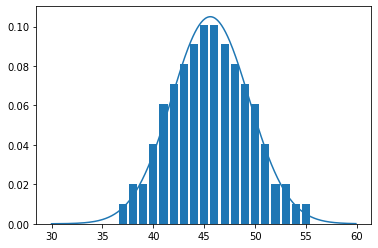

In [ ]:
from scipy.stats import norm 

values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr)) 

dist = norm(optimal_mu(), optimal_sigma())
x = np.arange(30, 60, 0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)

Como te habrás dado cuenta los valores óptimos de los parámetros coinciden perfectamente con las definiciones de media y desviación estándar, así como sus contrapartes en Numpy `arr.mean()`  y `arr.std()`.